In [32]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from wordcloud import WordCloud
from matplotlib import rcParams
from nltk.corpus import stopwords
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize
rcParams['font.family'] = 'tahoma'

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nonthapatkaewamporn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
gc = gspread.service_account(".config/gspread/service_account.json")
sh = gc.open("Big Data Final Project (Youtube)").sheet1

In [35]:
df = pd.DataFrame(sh.get_all_records())
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Jfuy9PI0wfQ,คนละหมัดหมอปลา ไล่จับพระถูกอ้างพฤติกรรมไม่เหมา...,2022-04-22T09:00:18Z,UCXm0bpjlfB0AF-ZdPhT0K1A,โหนกระแส (Hone-Krasae) Official,25,22.25.04,โหนกระแส|ดูออนไลน์|ย้อนหลัง|กระแส|มาแรง|ข่าว|ส...,961710,0,0,1818,https://i.ytimg.com/vi/Jfuy9PI0wfQ/default.jpg,False,True,มาร่วมตีแผ่กระแสที่แรงที่สุดในสังคม กับรายการโ...
396,ht4nMhSScZU,Safeplanet - นอนไม่หลับ ( Melatonin ),2022-04-20T12:00:13Z,UCK3tYCI5KyvsT1bM9R55eTQ,safeplanet,10,22.25.04,safeplanet|นอนไม่หลับ|melatonin|ในทุกวันและเวล...,489392,0,0,743,https://i.ytimg.com/vi/ht4nMhSScZU/default.jpg,False,True,Safeplanet. isThitiphat A. ( Alien ) : Guitar ...
397,8vU2Sd3oBMk,แก้แค้นเพื่อนที่ขังผมไว้ในกล่องใต้น้ำกรด | Min...,2022-04-22T01:15:00Z,UCA3fAq0nYRuw9imdjsSwkmw,DZER0,20,22.25.04,มายคราฟ|minecraft|การ์ตูน|dzer0|พี่นนท์|DZER0|...,142807,0,0,131,https://i.ytimg.com/vi/8vU2Sd3oBMk/default.jpg,False,True,ผมโดนเพื่อนขังไว้ในคุกน้ำกรด ซึ่งถ้าผมโดนน้ำกร...
398,th5w_jj_res,Iron Chef Thailand | 23 เม.ย. 65 SS11 EP.16 | ...,2022-04-23T11:00:34Z,UC48SZLSdauZtNea5geTxN8w,Iron Chef Thailand,24,22.25.04,เชฟกระทะเหล็ก|Iron Chef Thailand|ศึกค้นหาเชฟกร...,88156,0,0,56,https://i.ytimg.com/vi/th5w_jj_res/default.jpg,False,True,เชฟกระทะเหล็ก ประเทศไทย Iron Chef Thailandออกอ...


In [36]:
cat_id_to_word = {
    1: "Fiel & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    19: "Travel & Events",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers",
}

In [37]:
#set string as date time type for publishedAt

df["upload_days_before_trending"] = (pd.to_datetime(df["trending_date"], format="%y.%d.%m") - pd.to_datetime(pd.to_datetime(df["publishedAt"], format="%Y-%m-%dT%H:%M:%SZ").dt.date)).dt.days
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,upload_days_before_trending
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,1
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,2
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,2
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,1
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Jfuy9PI0wfQ,คนละหมัดหมอปลา ไล่จับพระถูกอ้างพฤติกรรมไม่เหมา...,2022-04-22T09:00:18Z,UCXm0bpjlfB0AF-ZdPhT0K1A,โหนกระแส (Hone-Krasae) Official,25,22.25.04,โหนกระแส|ดูออนไลน์|ย้อนหลัง|กระแส|มาแรง|ข่าว|ส...,961710,0,0,1818,https://i.ytimg.com/vi/Jfuy9PI0wfQ/default.jpg,False,True,มาร่วมตีแผ่กระแสที่แรงที่สุดในสังคม กับรายการโ...,3
396,ht4nMhSScZU,Safeplanet - นอนไม่หลับ ( Melatonin ),2022-04-20T12:00:13Z,UCK3tYCI5KyvsT1bM9R55eTQ,safeplanet,10,22.25.04,safeplanet|นอนไม่หลับ|melatonin|ในทุกวันและเวล...,489392,0,0,743,https://i.ytimg.com/vi/ht4nMhSScZU/default.jpg,False,True,Safeplanet. isThitiphat A. ( Alien ) : Guitar ...,5
397,8vU2Sd3oBMk,แก้แค้นเพื่อนที่ขังผมไว้ในกล่องใต้น้ำกรด | Min...,2022-04-22T01:15:00Z,UCA3fAq0nYRuw9imdjsSwkmw,DZER0,20,22.25.04,มายคราฟ|minecraft|การ์ตูน|dzer0|พี่นนท์|DZER0|...,142807,0,0,131,https://i.ytimg.com/vi/8vU2Sd3oBMk/default.jpg,False,True,ผมโดนเพื่อนขังไว้ในคุกน้ำกรด ซึ่งถ้าผมโดนน้ำกร...,3
398,th5w_jj_res,Iron Chef Thailand | 23 เม.ย. 65 SS11 EP.16 | ...,2022-04-23T11:00:34Z,UC48SZLSdauZtNea5geTxN8w,Iron Chef Thailand,24,22.25.04,เชฟกระทะเหล็ก|Iron Chef Thailand|ศึกค้นหาเชฟกร...,88156,0,0,56,https://i.ytimg.com/vi/th5w_jj_res/default.jpg,False,True,เชฟกระทะเหล็ก ประเทศไทย Iron Chef Thailandออกอ...,2


In [38]:
# to uppercase for comments_disabled and ratings_disabled
df["comments_disabled"] = df["comments_disabled"].str.upper()
df["ratings_disabled"] = df["ratings_disabled"].str.upper()
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,upload_days_before_trending
0,t3ED8-Wb1qA,เอาชีวิตรอด 100 วัน HARDCORE Minecraft จาก ห้ว...,2022-04-23T11:16:18Z,UCAeHTcJX2zRPRTCGrFKgamg,Aekk,20,22.24.04,Minecraft|มายคราฟ|เอาชีวิตรอด 100วัน|Minecraft...,390307,0,0,2040,https://i.ytimg.com/vi/t3ED8-Wb1qA/default.jpg,FALSE,TRUE,ทุกคนที่เข้าร่วมสามารถได้รับ 172 เพชร(หรือเงิน...,1
1,cdt7WfRVXVk,F.HERO x VannDa Ft. 1MILL & SPRITE - RUN THE T...,2022-04-22T12:00:25Z,UCRHhB1EVy0kfISY6_IOauxg,High Cloud Entertainment,10,22.24.04,น้ำหอมดิออร์มันอยู่ที่คอ|รันเดอะทาว|F.HERO|Spr...,1915653,0,0,9925,https://i.ytimg.com/vi/cdt7WfRVXVk/default.jpg,FALSE,TRUE,WE ARE READY TO #RUNTHETOWN !🎧 https://bfan.li...,2
2,kGzvNcNxC7k,ซอยชื่อแปลก หลงทั้งพิธีกร แขกรับเชิญ ยันทีมงาน...,2022-04-22T12:00:34Z,UC8XqGKvkVgmL_MCs4irRKqw,GoodDayOfficial,22,22.24.04,kodey|แม่เราชัดๆ|วัยรุ่น|contrast|ความแตกต่าง|...,739679,0,0,874,https://i.ytimg.com/vi/kGzvNcNxC7k/default.jpg,FALSE,TRUE,https://www.facebook.com/Gooddayofficial-22080...,2
3,UCynSrE2PWc,🔴LIVE ศึกคัดเลือกตัวแทนไทย AIC 2022 Pro Qualif...,2022-04-23T10:50:48Z,UCy19QXxbCHh8qVVCbuGk-ig,Garena RoV Thailand,20,22.24.04,[none],781650,0,0,213,https://i.ytimg.com/vi/UCynSrE2PWc/default.jpg,FALSE,TRUE,🔴LIVE วันนี้พบศึกชิงตั๋วทีมที่ 2 ไป AIC 2022AI...,1
4,K22MZ4wODok,ได้อยู่ - โอ๊ต ปราโมทย์ feat. MILLI [Official MV],2022-04-22T10:00:12Z,UClaWcr2EHnESxeANYikBkvQ,KHOTKOOL MUSIC,10,22.24.04,ได้อยู่|แก่น|โอ๊ตปราโมทย์|OatPramote|MILLI|KHO...,877580,0,0,986,https://i.ytimg.com/vi/K22MZ4wODok/default.jpg,FALSE,TRUE,Produced by Janpat MontrelerdrasmeLyric & Comp...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Jfuy9PI0wfQ,คนละหมัดหมอปลา ไล่จับพระถูกอ้างพฤติกรรมไม่เหมา...,2022-04-22T09:00:18Z,UCXm0bpjlfB0AF-ZdPhT0K1A,โหนกระแส (Hone-Krasae) Official,25,22.25.04,โหนกระแส|ดูออนไลน์|ย้อนหลัง|กระแส|มาแรง|ข่าว|ส...,961710,0,0,1818,https://i.ytimg.com/vi/Jfuy9PI0wfQ/default.jpg,FALSE,TRUE,มาร่วมตีแผ่กระแสที่แรงที่สุดในสังคม กับรายการโ...,3
396,ht4nMhSScZU,Safeplanet - นอนไม่หลับ ( Melatonin ),2022-04-20T12:00:13Z,UCK3tYCI5KyvsT1bM9R55eTQ,safeplanet,10,22.25.04,safeplanet|นอนไม่หลับ|melatonin|ในทุกวันและเวล...,489392,0,0,743,https://i.ytimg.com/vi/ht4nMhSScZU/default.jpg,FALSE,TRUE,Safeplanet. isThitiphat A. ( Alien ) : Guitar ...,5
397,8vU2Sd3oBMk,แก้แค้นเพื่อนที่ขังผมไว้ในกล่องใต้น้ำกรด | Min...,2022-04-22T01:15:00Z,UCA3fAq0nYRuw9imdjsSwkmw,DZER0,20,22.25.04,มายคราฟ|minecraft|การ์ตูน|dzer0|พี่นนท์|DZER0|...,142807,0,0,131,https://i.ytimg.com/vi/8vU2Sd3oBMk/default.jpg,FALSE,TRUE,ผมโดนเพื่อนขังไว้ในคุกน้ำกรด ซึ่งถ้าผมโดนน้ำกร...,3
398,th5w_jj_res,Iron Chef Thailand | 23 เม.ย. 65 SS11 EP.16 | ...,2022-04-23T11:00:34Z,UC48SZLSdauZtNea5geTxN8w,Iron Chef Thailand,24,22.25.04,เชฟกระทะเหล็ก|Iron Chef Thailand|ศึกค้นหาเชฟกร...,88156,0,0,56,https://i.ytimg.com/vi/th5w_jj_res/default.jpg,FALSE,TRUE,เชฟกระทะเหล็ก ประเทศไทย Iron Chef Thailandออกอ...,2


In [39]:
df["category"] = df["categoryId"].map(cat_id_to_word)
df["category"]

0               Gaming
1                Music
2       People & Blogs
3               Gaming
4                Music
            ...       
395    News & Politics
396              Music
397             Gaming
398      Entertainment
399          Education
Name: category, Length: 400, dtype: object

<AxesSubplot:>

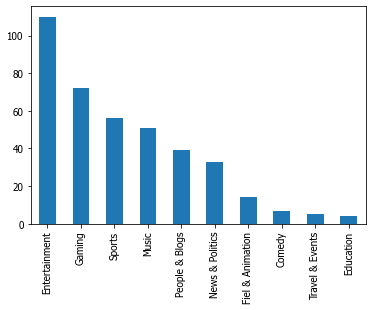

In [40]:
df["category"].value_counts().nlargest(10).plot(kind="bar")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_tags', ylabel='count'>

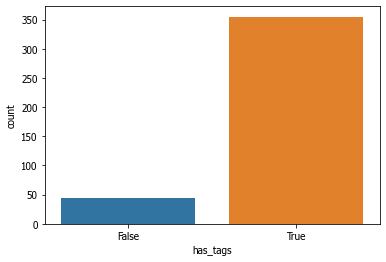

In [41]:
df["has_tags"] = df["tags"] != "[none]"
sns.countplot(df["has_tags"])

In [42]:
df[df["has_tags"]]["view_count"].describe()

count    3.550000e+02
mean     1.078408e+06
std      5.726567e+06
min      0.000000e+00
25%      1.233625e+05
50%      2.771230e+05
75%      5.859670e+05
max      8.113224e+07
Name: view_count, dtype: float64

In [43]:
df[df["has_tags"] == False]["view_count"].describe()

count    4.500000e+01
mean     5.881357e+05
std      1.198648e+06
min      2.686500e+04
25%      9.229000e+04
50%      3.222560e+05
75%      6.222790e+05
max      8.010830e+06
Name: view_count, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='upload_days_before_trending', ylabel='count'>

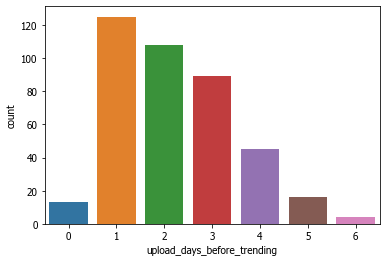

In [44]:
sns.countplot(df["upload_days_before_trending"])

In [45]:
# get list of duplicate channelTitle
df["channelTitle"].value_counts().loc[lambda x: x>1]


HEARTROCKER                6
Mandee Channel             6
TrueVisionsOfficial        6
Garena RoV Thailand        6
GOTJISIRI CH               5
                          ..
Panu Online                2
ดินแดนสนธยา                2
Skylaxy Channel            2
เนสกาแฟ ศรีนคร Official    2
Gene Lab                   2
Name: channelTitle, Length: 130, dtype: int64

In [46]:
df["upload_days_before_trending"].describe()

count    400.000000
mean       2.230000
std        1.259391
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: upload_days_before_trending, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='comments_disabled', ylabel='count'>

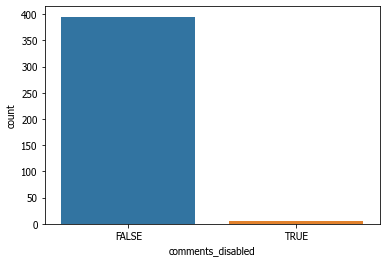

In [47]:
sns.countplot(df["comments_disabled"])

<AxesSubplot:xlabel='category', ylabel='view_count'>

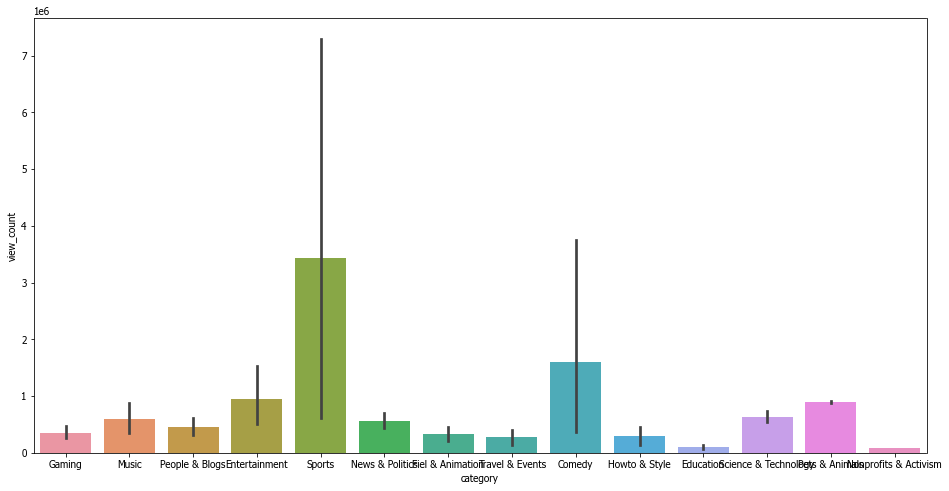

In [48]:
plt.figure(figsize=(16,8))
sns.barplot(x=df["category"], y=df["view_count"])

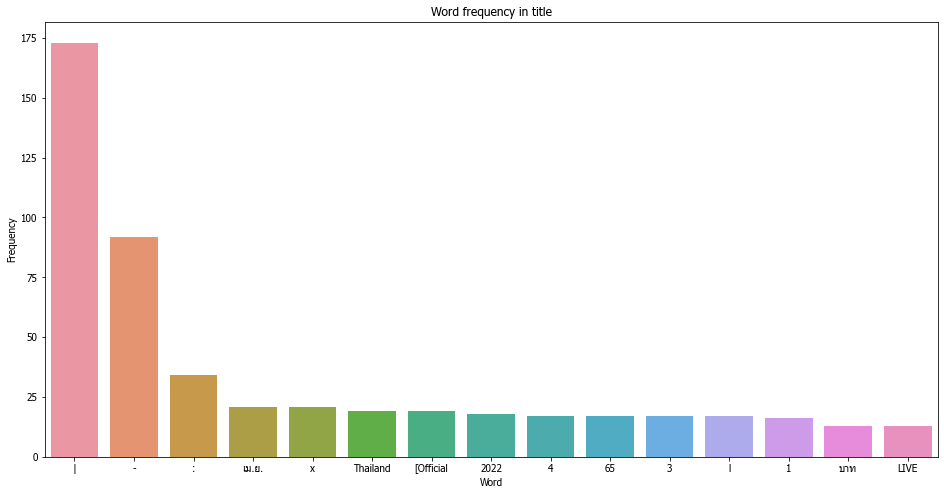

In [49]:
freq = df["title"].str.split(expand=True).stack().value_counts().nlargest(15)
plt.figure(figsize=(16,8))
plot = sns.barplot(x=freq.keys(), y=freq.values)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Word frequency in title")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127386 missing from current font.
  font.set_text(s, 0, flags=flags)


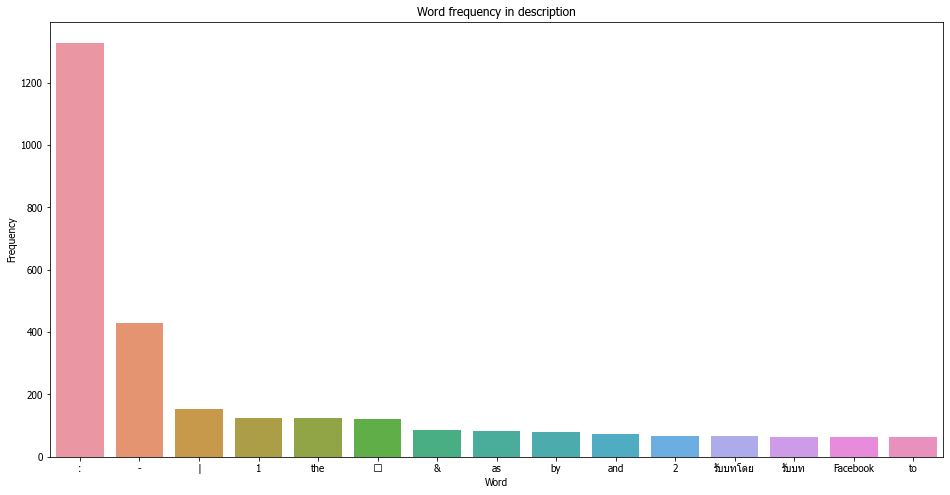

In [50]:
freq = df["description"].str.split(expand=True).stack().value_counts().nlargest(15)
plt.figure(figsize=(16,8))
plot = sns.barplot(x=freq.keys(), y=freq.values)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Word frequency in description")
plt.show()

In [60]:
#word_tokenize(df.loc[4]["title"], engine="newmm")
custom_stopwords = {
    "Official",
    "MV",
    "feat",
    "X",
}
stop_words = list(set(stopwords.words('english')).union(set(thai_stopwords())).union(custom_stopwords))
def tokenize(text):
    text = re.sub(r'((http)\S+)',' ',text)
    tokenized_text = word_tokenize(normalize(re.sub(r"[^\w\s\u0E00-\u0E7F]","",text)), engine="deepcut")
    tokenized_filtered_text = [word for word in tokenized_text if word not in stop_words]
    return tokenized_filtered_text

In [52]:
df["description"] = df["description"].fillna("[]")

In [61]:
df["tokenized_description"] = df["description"].apply(tokenize)
df["tokenized_description"]

ModuleNotFoundError: No module named 'deepcut'

In [54]:
def word_cloud(df_col, plt_title):
    regexp = r"[ก-๙a-zA-Z']+"
    wordcloud = WordCloud(
        background_color="white", 
        font_path="/Users/nonthapatkaewamporn/Library/Fonts/THSarabunNew.ttf",
        font_step=4,
        collocations=False,
        regexp=regexp,
        stopwords=stop_words,
        max_words=100
        ).generate(" ".join(df_col.apply(lambda x: re.sub(r"\s+"," "," ".join(x)))))
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(plt_title)
    plt.axis('off')
    plt.show()

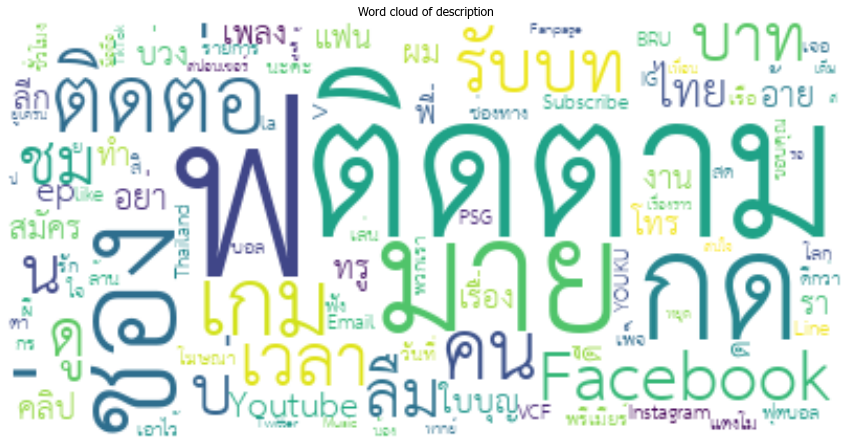

In [55]:
word_cloud(df["tokenized_description"], "Word cloud of description")

In [56]:
df["tokenized_title"] = df["title"].apply(tokenize)
df["tokenized_title"]

0      [เอาชีวิต, รอด,  , 100,  ,  , HARDCORE,  , Min...
1      [FHERO,  , x,  , VannDa,  , Ft,  , 1, MILL,  ,...
2      [ซอย, ชื่อ, แปลก,  , หลง, พิธีกร,  , แขกรับเชิ...
3      [LIVE,  , ศึก, คัดเลือก, ตัวแทน, ไทย,  , AIC, ...
4              [ , โอ๊ต,  , ปราโมทย์,  ,  , MILLI,  ,  ]
                             ...                        
395    [คนละ, หมัด, หมอ, ปลา,  , ไล่, พระ, อ้าง, พฤติ...
396            [Safeplanet,  , นอนไม่หลับ,  , Melatonin]
397    [แก้แค้น, เพื่อน, ขัง, ผม, กล่อง, น้ำกรด,  , M...
398    [Iron,  , Chef,  , Thailand,  , 23,  , เม, ย, ...
399    [คะแนน,  , GAT,  , PAT,  , วิชา, สามัญ, 65,  ,...
Name: tokenized_title, Length: 400, dtype: object

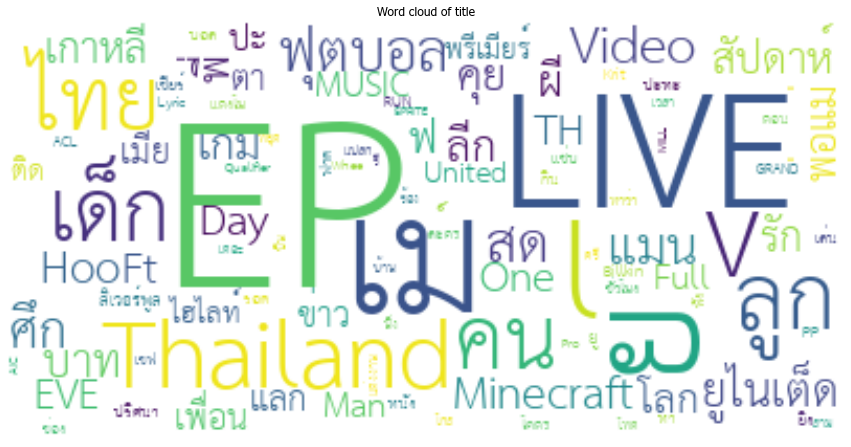

In [57]:
word_cloud(df["tokenized_title"], "Word cloud of title")

In [58]:
df["tags"] = df["tags"].apply(lambda x: str(x).split("|") if x != "[none]" else [])
df["tags"]

0      [Minecraft, มายคราฟ, เอาชีวิตรอด 100วัน, Minec...
1      [น้ำหอมดิออร์มันอยู่ที่คอ, รันเดอะทาว, F.HERO,...
2      [kodey, แม่เราชัดๆ, วัยรุ่น, contrast, ความแตก...
3                                                     []
4      [ได้อยู่, แก่น, โอ๊ตปราโมทย์, OatPramote, MILL...
                             ...                        
395    [โหนกระแส, ดูออนไลน์, ย้อนหลัง, กระแส, มาแรง, ...
396    [safeplanet, นอนไม่หลับ, melatonin, ในทุกวันแล...
397    [มายคราฟ, minecraft, การ์ตูน, dzer0, พี่นนท์, ...
398    [เชฟกระทะเหล็ก, Iron Chef Thailand, ศึกค้นหาเช...
399    [TCAS, แอดมิชชั่น, เรียลลิตี้, การศึกษา, ม.ปลา...
Name: tags, Length: 400, dtype: object

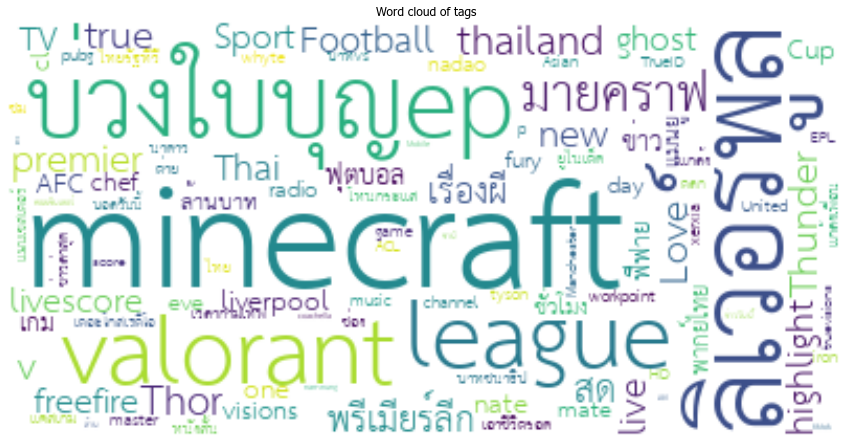

In [59]:
word_cloud(df["tags"], "Word cloud of tags")